# 상관계수에 따른 리스크 완화

## 3.7.4  
다우존스 지수와 KOSPI의 회긔 분석

In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

In [3]:
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X': dow['Close'], 'Y': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


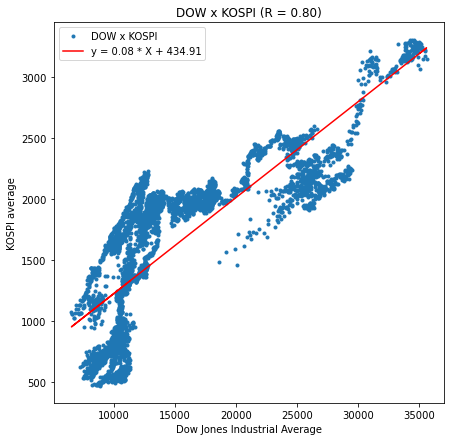

In [6]:
plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI average')
plt.show()